In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve

In [28]:
#Import Censored Data
censored_df=pd.read_csv('censored_tweets.csv')
censored_df = pd.DataFrame(censored_df)
censored_df.insert(loc=3, column='y', value=0)
censored_df = censored_df.drop(['id','lang'],axis=1)

#import regular tweets
uncensored_df=pd.read_csv('regular_tweets.csv')
uncensored_df = pd.DataFrame(uncensored_df)
uncensored_df.insert(loc=3, column='y', value=1)
uncensored_df = uncensored_df.drop(['id','lang'],axis=1)

In [29]:
#merge and shufflem
df = pd.concat([censored_df, uncensored_df], ignore_index=True, sort=False)
df = shuffle(df)

In [30]:
df_x=df["text"]
df_y=df["y"]

In [31]:
cv = CountVectorizer()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [33]:
x_train.head()

1177    @SenTedCruz This is so WRONG @realDonaldTrump ...
945     BET NOW with #Betonpolitics and get Bet on any...
773     What's the most inspiring book(s) you've ever ...
3752    i want my next girlfriend to know we're securi...
1044    The IG report along with other information ava...
Name: text, dtype: object

In [34]:
cv = TfidfVectorizer()

In [35]:
x_traincv=cv.fit_transform(x_train)
x_train.iloc[0]

'@SenTedCruz This is so WRONG @realDonaldTrump @netanyahu @DebbieAAldrich @ChuckNASCAR @ACTBrigitte @RealJamesWoods @JoeTalkShow @WayneDupreeShow @larryelder @dbongino https://t.co/cFCLscTxjI'

In [36]:
x_testcv=cv.transform(x_test)
x_testcv.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
mnb = MultinomialNB()

In [38]:

y_train=y_train.astype('int')
y_train

1177    0
945     0
773     0
3752    1
1044    0
       ..
1631    0
2714    1
2801    1
583     0
1046    0
Name: y, Length: 3110, dtype: int32

In [39]:
mnb.fit(x_traincv,y_train)

MultinomialNB()

In [40]:
testmessage=x_test.iloc[0]
testmessage

'A Rigged System - They don’t want to turn over Documents to Congress. What are they afraid of? Why so much redacting? Why such unequal “justice?” At some point I will have no choice but to use the powers granted to the Presidency and get involved!'

In [41]:
predictions=mnb.predict(x_testcv)

In [42]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Accuracy: ", mnb.score(x_testcv, y_test))

[[287  84]
 [ 85 322]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       371
           1       0.79      0.79      0.79       407

    accuracy                           0.78       778
   macro avg       0.78      0.78      0.78       778
weighted avg       0.78      0.78      0.78       778

Accuracy:  0.7827763496143959


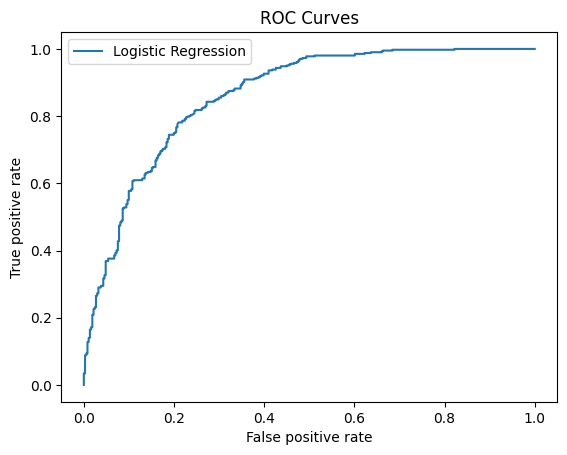

In [43]:
scores = mnb.predict_proba(x_testcv)
fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
plt.plot(fpr, tpr)

#Plot
plt.title('ROC Curves')
plt.xlabel('False positive rate'); plt.ylabel('True positive rate')
plt.legend(['Logistic Regression'])
plt.show()

In [44]:
testSentence = ["the earth is flat"]
sentenceTransformed=cv.transform(testSentence)
result = mnb.predict_proba(sentenceTransformed)
print("This tweet has a: ", result[0,1], " chance of being censored.")
print("This tweet has a: ", result[0,0], " chance of being left uncensored.")

This tweet has a:  0.6959804640513251  chance of being censored.
This tweet has a:  0.30401953594867454  chance of being left uncensored.
